In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections as col
import numpy as np 
import time
import json
import requests
import datetime as dt

## Import and inspect data

In [2]:
oil_df = pd.read_csv('oildataRAW.csv')
price_df = pd.read_csv('price_per_barrel_01042010-01312017.csv')
#note that I removed the first three text columns so that the csv could be read properly(js)

In [3]:
oil_df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [4]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
Report Number                           2795 non-null int64
Supplemental Number                     2795 non-null int64
Accident Year                           2795 non-null int64
Accident Date/Time                      2795 non-null object
Operator ID                             2795 non-null int64
Operator Name                           2795 non-null object
Pipeline/Facility Name                  2674 non-null object
Pipeline Location                       2795 non-null object
Pipeline Type                           2777 non-null object
Liquid Type                             2795 non-null object
Liquid Subtype                          1349 non-null object
Liquid Name                             222 non-null object
Accident City                           2480 non-null object
Accident County                         2720 non-null object
Accident State                          2783

## Sort by Cost

In [5]:
df_byCost = oil_df.sort_values(by=['All Costs'], ascending=False)
info = ['Accident Year','Operator Name','Accident City', 'Accident State', 'Cause Category'
       ,'Cause Subcategory','All Costs']

In [6]:
type(df_byCost)

pandas.core.frame.DataFrame

In [7]:
cost_op = df_byCost.groupby('Operator Name')['All Costs'].sum().sort_values(ascending=False)

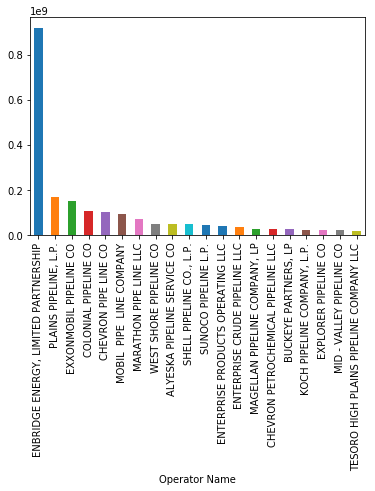

In [8]:
cost_op.head(20).plot.bar()
#make this look better. maybe use seaborn. 

In [9]:
cost_st = df_byCost.groupby('Accident State')['All Costs'].sum().sort_values(ascending=False)

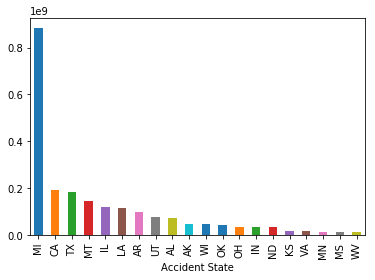

In [10]:
cost_st.head(20).plot.bar()

## MOST COMMON "SPILLERS"

In [11]:
most_common = col.Counter(oil_df["Operator ID"].values)
ids = [x[0] for x in most_common.most_common(20)]

hXvalue = []
hvalues = []
hlabels = []

for j,i in enumerate(ids):
    hXvalue.append(j+1)
    hvalues.append(most_common[i])
    hlabels.append(" or ".join(oil_df['Operator Name'].loc[oil_df['Operator ID'] == i].unique()))

hlabels,hvalues

spillers = dict(zip(hlabels, hvalues))

In [12]:
spillers = {'operator': hlabels, 'spills': hvalues}
spillers = pd.DataFrame.from_dict(spillers)

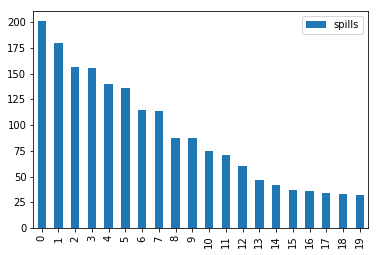

In [13]:
spillers.plot.bar()

In [14]:
spillers

,operator,spills
0,"TEPPCO CRUDE PIPELINE, LLC or ENTERPRISE CRUDE...",201
1,SUNOCO PIPELINE L.P.,180
2,"PLAINS PIPELINE, L.P.",156
3,ENTERPRISE PRODUCTS OPERATING LLC,155
4,"MAGELLAN PIPELINE COMPANY, LP",140
5,COLONIAL PIPELINE CO,136
6,"BUCKEYE PARTNERS, LP",115
7,CONOCOPHILLIPS or PHILLIPS 66 PIPELINE LLC,114
8,"KINDER MORGAN LIQUID TERMINALS, LLC",87
9,MARATHON PIPE LINE LLC,87


### MOST COMMON SPILL CAUSES

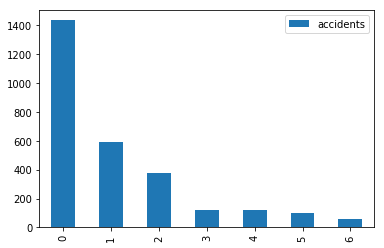

In [15]:
spill_causes = col.Counter(oil_df["Cause Category"].values)
ids2 = [x[0] for x in spill_causes.most_common(10)]
hXvalue2 = []
hvalues2 = []
hlabels2 = []

for j,i in enumerate(ids2):
    hXvalue2.append(j+1)
    hvalues2.append(spill_causes[i])
    hlabels2.append(i)

hlabels2, hvalues2

causes = dict(zip(hlabels2, hvalues2))
causes = {'cause': hlabels2, 'accidents': hvalues2}
causes = pd.DataFrame.from_dict(causes)
causes.plot.bar()

In [16]:
causes

,accidents,cause
0,1435,MATERIAL/WELD/EQUIP FAILURE
1,592,CORROSION
2,378,INCORRECT OPERATION
3,118,NATURAL FORCE DAMAGE
4,118,ALL OTHER CAUSES
5,97,EXCAVATION DAMAGE
6,57,OTHER OUTSIDE FORCE DAMAGE


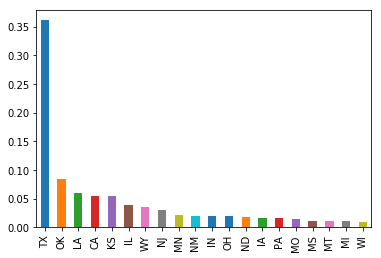

In [17]:
spills_per_state_percentage = oil_df["Accident State"].value_counts(normalize=True).sort_values(ascending=False);
spills_per_state_number = oil_df["Accident State"].value_counts()
spills_per_state_percentage
# spills_per_state_number
spills_per_state_percentage.head(20).plot.bar();

## By state
 - Property damage
 - Non-accident states

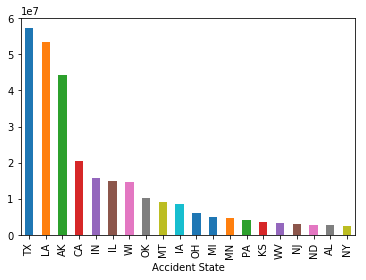

In [18]:
property_damage = oil_df.groupby("Accident State")["Property Damage Costs"].sum().sort_values(ascending=False)
property_damage.head(20).plot.bar();

In [19]:
oil_df['Accident State'].factorize()

(array([ 0,  1,  2, ...,  6, 20,  4]),
 Index(['KS', 'ME', 'LA', 'WI', 'TX', 'ND', 'OK', 'IL', 'MN', 'NY', 'CA', 'IN',
        'CO', 'MS', 'NJ', 'WA', 'IA', 'NC', 'MO', 'NM', 'PA', 'FL', 'VA', 'WY',
        'KY', 'TN', 'MI', 'ID', 'GA', 'NV', 'OH', 'SD', 'AK', 'SC', 'UT', 'NE',
        'MT', 'AL', 'AR', 'MD', 'PR', 'CT', 'OR', 'WV', 'HI', 'MA'],
       dtype='object'))

In [20]:
states = ['KS', 'ME', 'LA', 'WI', 'TX', 'ND', 'OK', 'IL', 'MN', 'NY', 'CA', 'IN',
        'CO', 'MS', 'NJ', 'WA', 'IA', 'NC', 'MO', 'NM', 'PA', 'FL', 'VA', 'WY',
        'KY', 'TN', 'MI', 'ID', 'GA', 'NV', 'OH', 'SD', 'AK', 'SC', 'UT', 'NE',
        'MT', 'AL', 'AR', 'MD', 'PR', 'CT', 'OR', 'WV', 'HI', 'MA']
len(states)

46

In [21]:
states_2 = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
non_accident_states = list(set(states_2) - set(states))
non_accident_states

['RI', 'DC', 'DE', 'VT', 'AZ', 'NH']

In [22]:
accident_causes = oil_df.groupby("Accident State")["Cause Subcategory"].value_counts()
accident_causes["HI"]

Cause Subcategory
EXTERNAL                                2
THREADED CONNECTION/COUPLING FAILURE    1
Name: Cause Subcategory, dtype: int64

## Fatalities

In [23]:
oil_df['All Fatalities'].sum()

10.0

In [24]:
oil_df['All Fatalities'].max()

2.0

In [25]:
oil_df.loc[oil_df['All Fatalities'] == 2]

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
758,20120098,17932,2012,3/3/2012 2:04 AM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",LINE 64,ONSHORE,ABOVEGROUND,CRUDE OIL,...,0.0,2.0,2.0,864819.0,124500.0,0.0,915512.0,931946.0,0.0,2836777
2730,20160391,21890,2016,10/31/2016 2:51 PM,2552,COLONIAL PIPELINE CO,LINE 01,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [26]:
worst_fatalty_daysworst_fa  = oil_df.loc[oil_df['All Fatalities'] == 2]['Accident Date/Time']
oil_df.loc[oil_df['All Fatalities'] == 2]['Accident Date/Time']

758       3/3/2012 2:04 AM
2730    10/31/2016 2:51 PM
Name: Accident Date/Time, dtype: object

## Injuries

In [27]:
oil_df['All Injuries'].sum()

20.0

In [28]:
oil_df['All Injuries'].max()

4.0

In [29]:
oil_df.loc[oil_df['All Injuries'] == 4]

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
2730,20160391,21890,2016,10/31/2016 2:51 PM,2552,COLONIAL PIPELINE CO,LINE 01,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [30]:
worst_injury_days = oil_df.loc[oil_df['All Injuries'] == 2]['Accident Date/Time']
oil_df.loc[oil_df['All Injuries'] == 2]['Accident Date/Time']

1385    9/30/2013 6:45 PM
Name: Accident Date/Time, dtype: object

## Other distributions and counts

In [31]:
liquid_type = oil_df["Liquid Type"].value_counts()
liquid_type

CRUDE OIL                                               1398
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID       939
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS               418
CO2 (CARBON DIOXIDE)                                      38
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)       2
Name: Liquid Type, dtype: int64

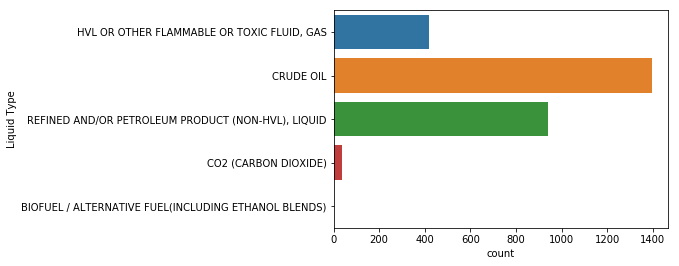

In [32]:
cp = sns.countplot(y=oil_df['Liquid Type'], data=oil_df)

In [33]:
location = oil_df["Pipeline Location"].value_counts()
location

ONSHORE     2777
OFFSHORE      18
Name: Pipeline Location, dtype: int64

In [34]:
pipeline_type = oil_df["Pipeline Type"].value_counts()
pipeline_type

ABOVEGROUND        1475
UNDERGROUND         985
TANK                301
TRANSITION AREA      16
Name: Pipeline Type, dtype: int64

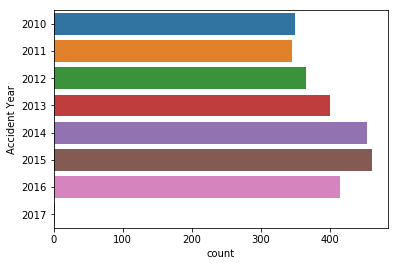

In [35]:
cpy = sns.countplot(y=oil_df['Accident Year'], data=oil_df)

## Causes and subcauses
(industry as a whole)

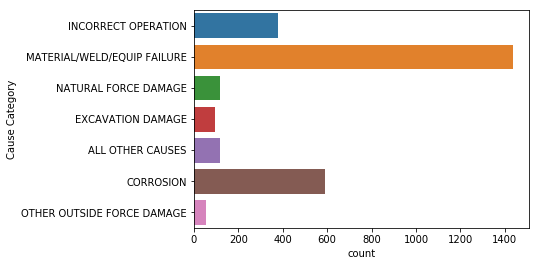

In [36]:
cp = sns.countplot(y=oil_df['Cause Category'], data=oil_df)

In [37]:
oil_df_n = oil_df.rename(columns={'Cause Subcategory': 'cause_subcategory', 'Net Loss (Barrels)': 'net_loss'})

In [38]:
plt.rcParams['figure.figsize']=(20,15)
plt.rcParams['axes.labelsize']=12
#remap key values

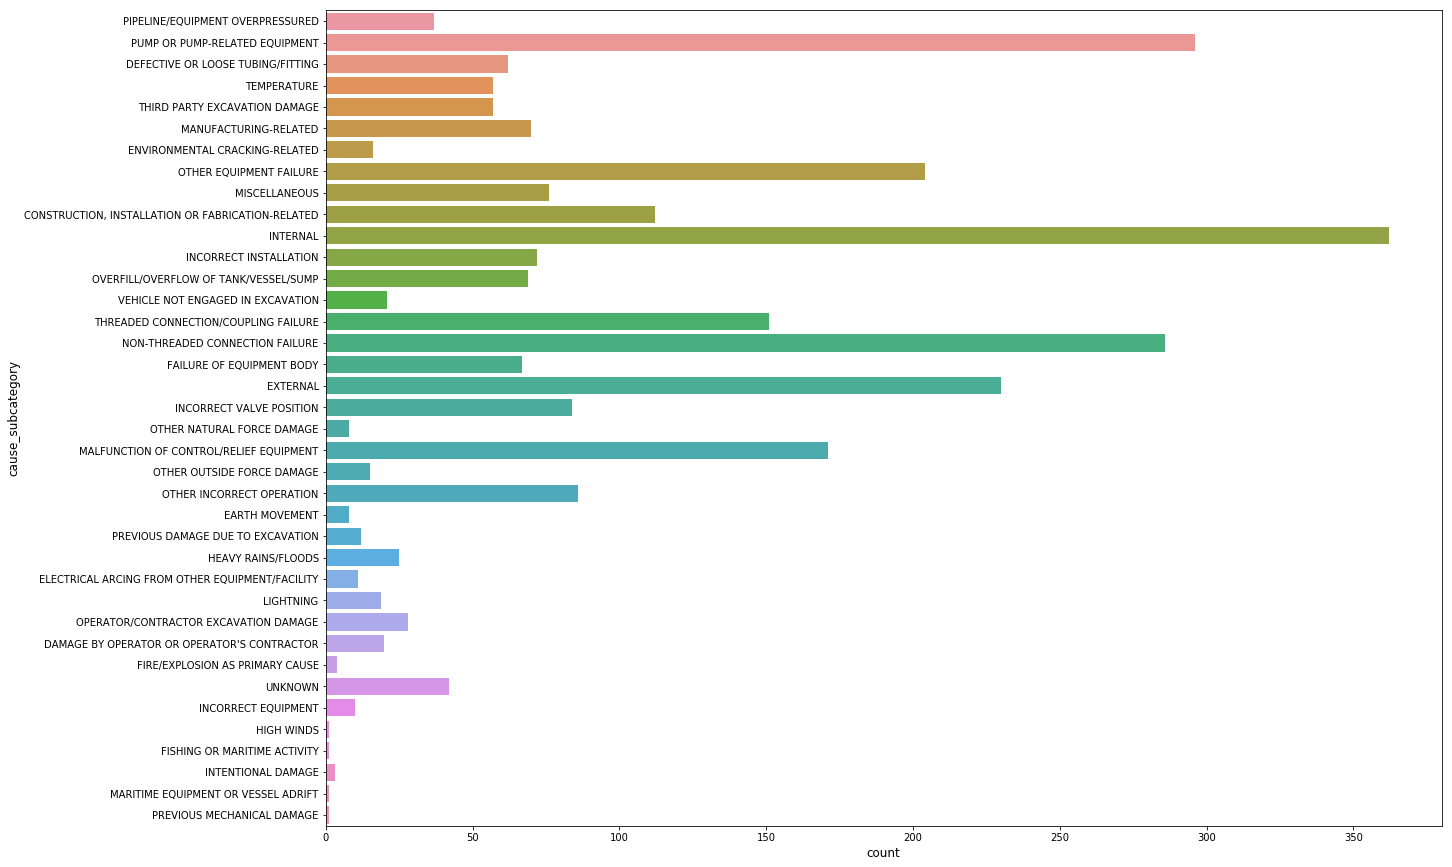

In [39]:
sns.countplot(y=oil_df_n['cause_subcategory'], data=oil_df_n);
#loss in barrels

In [40]:
df_sm = oil_df_n[['net_loss','cause_subcategory']]

In [41]:
subcat = df_sm.groupby('cause_subcategory').sum()

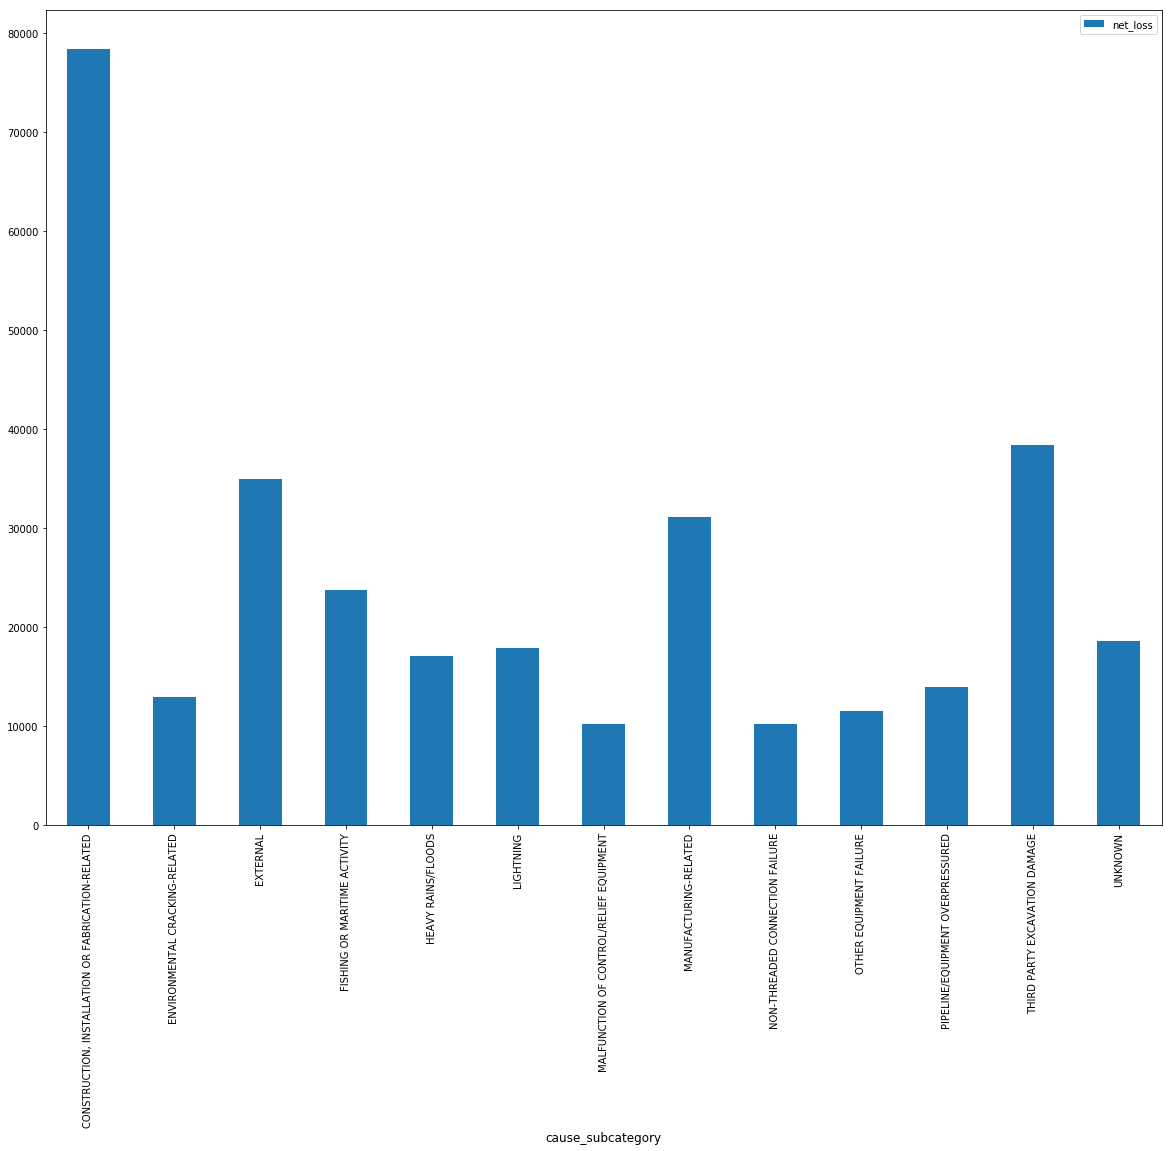

In [42]:
subcat.query('net_loss > 10000').plot.bar();
#TODO sort these values - fix this

## Price distribution

In [43]:
pricedf = price_df.rename(columns={'Series ID: PET.RWTC.D Dollars per Barrel': 'ppb'})
pricedf = pricedf.dropna()
pricedf['Day'] = pd.to_datetime(pricedf.Day)
pricedf = pricedf.sort_values('Day')

In [44]:
pricedf.head()

,Day,ppb
1784,2010-01-04,81.52
1783,2010-01-05,81.74
1782,2010-01-06,83.12
1781,2010-01-07,82.60
1780,2010-01-08,82.74


In [45]:
pricedf.shape

(1785, 2)

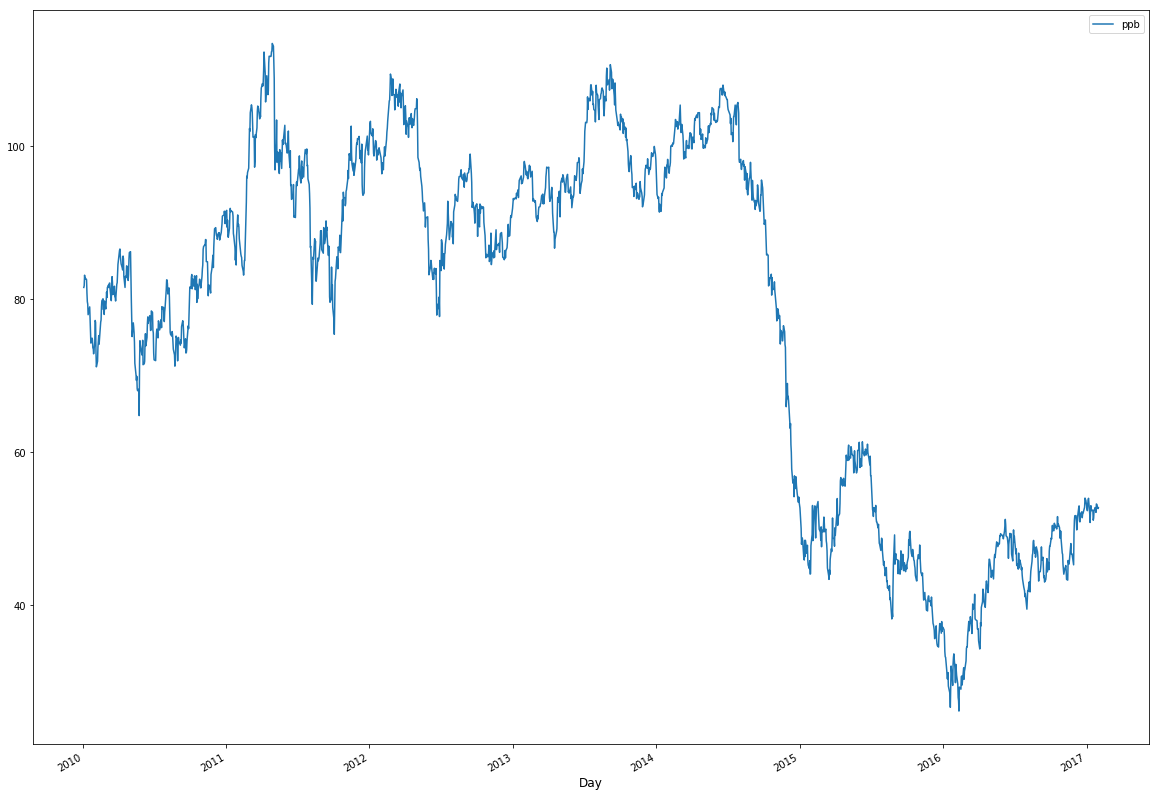

In [46]:
pricedf.plot(x='Day', y='ppb');
#on same thing plot number of accidents

## Merge the datasets

In [47]:
oil_df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [48]:
oil_df['Accident Date/Time'].dtype

dtype('O')

In [49]:
oil_df['accident_date'] = pd.to_datetime(oil_df['Accident Date/Time'])

In [50]:
oil_df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627,2010-01-01 07:15:00
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008,2010-01-04 08:30:00
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200,2010-01-05 10:30:00
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540,2010-01-06 19:30:00
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650,2010-01-07 13:00:00


In [51]:
oil_df['accident_date'] = oil_df['accident_date'].dt.date

In [52]:
oil_df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627,2010-01-01
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008,2010-01-04
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200,2010-01-05
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540,2010-01-06
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650,2010-01-07


In [53]:
oil_df['accident_date'].dtype

dtype('O')

In [54]:
oil_df['accident_date'] = pd.to_datetime(oil_df['accident_date'])

In [55]:
oil_df['accident_date'].dtype

dtype('<M8[ns]')

In [56]:
oil_df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627,2010-01-01
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008,2010-01-04
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200,2010-01-05
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540,2010-01-06
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650,2010-01-07


In [151]:
oil_df.query('accident_date' == '2014-03-14')

ValueError: expr must be a string to be evaluated, <class 'bool'> given

In [57]:
pricedf.dtypes

Day    datetime64[ns]
ppb           float64
dtype: object

In [58]:
# oil_df = oil_df.sort_values('accident_date')

In [129]:
joined = pd.merge(oil_df, pricedf, how='inner', left_on='accident_date', right_on='Day')
# joined = pd.merge(oil_df, pricedf, how='outer', left_on='accident_date', right_on='Day')
# joined.shape = (3317, 51)

In [60]:
sampledf = joined.sample(20)

In [130]:
joined.shape

(2254, 52)

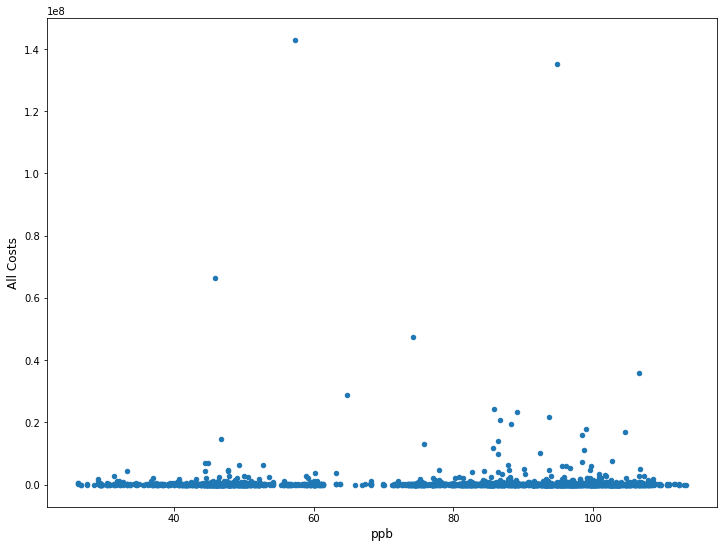

In [131]:
joined.plot.scatter(x='ppb', y='All Costs')

In [132]:
#group by months
joined['month'] = joined['accident_date'].dt.strftime("%b")
joined['year'] = joined['accident_date'].dt.strftime("%y")

In [133]:
joined.sample(10)

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,accident_date,month,Day,ppb,year
351,20110112,18061,2011,3/14/2011 8:31 AM,26041,"KINDER MORGAN LIQUID TERMINALS, LLC",CARTERET TERMINAL,ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,0.0,30791.0,347000.0,0.0,1380791,2011-03-14,Mar,2011-03-14,101.20,11
51,20100034,18573,2010,3/11/2010 10:00 AM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,0.0,5000.0,2000.0,0.0,8060,2010-03-11,Mar,2010-03-11,82.10,10
727,20120230,18542,2012,7/24/2012 12:00 AM,31947,ENBRIDGE PIPELINES (OZARK) L.L.C.,CUSHING TERMINAL NORTH,ONSHORE,UNDERGROUND,CRUDE OIL,...,0.0,1500.0,1000.0,0.0,27600,2012-07-24,Jul,2012-07-24,88.28,12
42,20100011,17630,2010,3/1/2010 9:16 AM,15774,ENBRIDGE PIPELINES (NORTH DAKOTA) LLC,CLEARBROOK TERMINAL,ONSHORE,ABOVEGROUND,CRUDE OIL,...,0.0,0.0,3000.0,16000.0,19080,2010-03-01,Mar,2010-03-01,78.71,10
772,20120300,17674,2012,9/18/2012 6:30 AM,300,"PLAINS PIPELINE, L.P.",MCCAMEY TANK FARM,ONSHORE,UNDERGROUND,CRUDE OIL,...,0.0,3000.0,0.0,0.0,44000,2012-09-18,Sep,2012-09-18,95.25,12
330,20110054,18060,2011,2/16/2011 12:30 PM,26041,"KINDER MORGAN LIQUID TERMINALS, LLC",CARTERET TERMINAL,ONSHORE,TANK,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,0.0,0.0,2500.0,0.0,2500,2011-02-16,Feb,2011-02-16,83.80,11
2128,20160289,21683,2016,8/10/2016 9:15 AM,39013,TESORO SOCAL PIPELINE COMPANY LLC,T2 TERMINAL,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,0.0,63000.0,48000.0,0.0,500000,2016-08-10,Aug,2016-08-10,41.75,16
592,20120066,16666,2012,2/14/2012 1:20 PM,30829,ENTERPRISE CRUDE PIPELINE LLC,NaN,ONSHORE,UNDERGROUND,CRUDE OIL,...,0.0,20000.0,45000.0,0.0,75000,2012-02-14,Feb,2012-02-14,100.82,12
2226,20160432,21998,2016,12/1/2016 3:57 AM,30782,HARVEST PIPELINE COMPANY,TCV CO2 PIPELINE,ONSHORE,ABOVEGROUND,CO2 (CARBON DIOXIDE),...,0.0,0.0,0.0,0.0,51,2016-12-01,Dec,2016-12-01,51.08,16
1267,20140126,19378,2014,3/17/2014 5:00 PM,31684,PHILLIPS 66 PIPELINE LLC,THUMS LINE,ONSHORE,UNDERGROUND,CRUDE OIL,...,30000.0,300000.0,45000.0,0.0,400900,2014-03-17,Mar,2014-03-17,98.43,14


In [134]:
time_price = joined[['month', 'year', 'ppb']]

In [135]:
time_price.sample(20)

,month,year,ppb
1832,Oct,15,46.38
1127,Oct,13,103.08
669,May,12,97.13
1041,Jun,13,95.47
1162,Dec,13,97.14
1443,Sep,14,93.59
1821,Oct,15,47.86
1759,Aug,15,43.11
2209,Nov,16,44.88
73,Apr,10,85.64


In [136]:
tp = time_price.groupby(['year', 'month'])['ppb'].mean()
# .sort_values(ascending=False)

In [137]:
ap = time_price.groupby(['year', 'month'])['ppb'].count()

In [138]:
ap

year  month
10    Apr      27
      Aug      26
      Dec      34
      Feb      13
      Jan      28
      Jul      22
      Jun      26
      Mar      28
      May      21
      Nov      34
      Oct       9
      Sep      23
11    Apr      20
      Aug      29
      Dec      25
      Feb      30
      Jan      22
      Jul      19
      Jun      21
      Mar      23
      May      18
      Nov      18
      Oct      27
      Sep      19
12    Apr      29
      Aug      25
      Dec      25
      Feb      27
      Jan      21
      Jul      23
               ..
14    Mar      39
      May      30
      Nov      26
      Oct      21
      Sep      27
15    Apr      34
      Aug      33
      Dec      19
      Feb      26
      Jan      35
      Jul      35
      Jun      31
      Mar      36
      May      28
      Nov      34
      Oct      41
      Sep      34
16    Apr      20
      Aug      40
      Dec      27
      Feb      34
      Jan      36
      Jul      27
      Jun      3

In [139]:
tp

year  month
10    Apr       84.606296
      Aug       76.553077
      Dec       88.879412
      Feb       76.793846
      Jan       79.390357
      Jul       76.015455
      Jun       74.528462
      Mar       80.872143
      May       72.173333
      Nov       84.450588
      Oct       82.196667
      Sep       74.838261
11    Apr      109.330500
      Aug       86.122069
      Dec       99.224000
      Feb       88.626333
      Jan       90.044545
      Jul       97.346842
      Jun       96.769048
      Mar      102.036957
      May      102.651667
      Nov       97.659444
      Oct       84.675926
      Sep       86.175263
12    Apr      102.716207
      Aug       94.538800
      Dec       88.089600
      Feb      101.875926
      Jan      100.006190
      Jul       88.127391
                  ...    
14    Mar      100.923333
      May      101.765333
      Nov       75.948462
      Oct       84.947619
      Sep       93.873333
15    Apr       54.672647
      Aug       42.521515


In [143]:
plt.rcParams['figure.figsize']=(10,9)

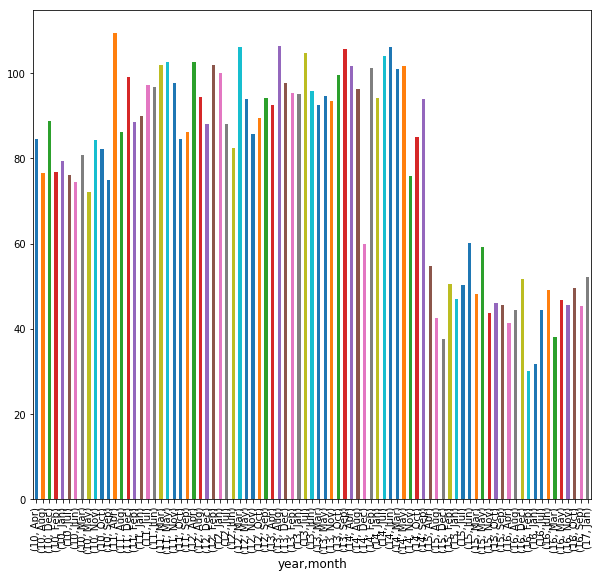

In [144]:
tp.plot.bar()

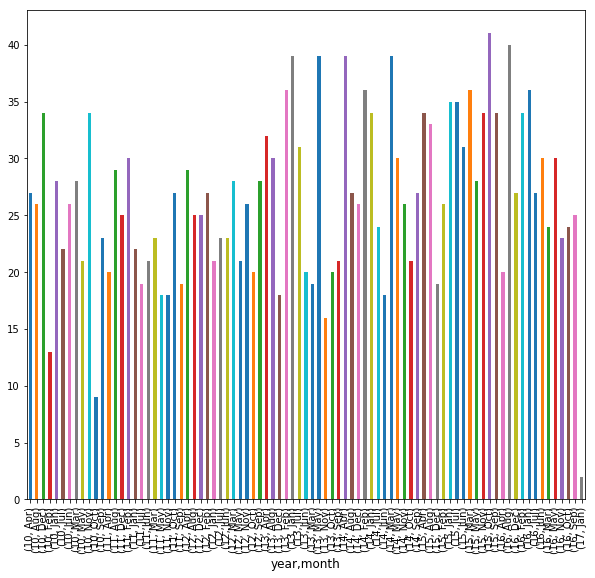

In [145]:
ap.plot.bar();

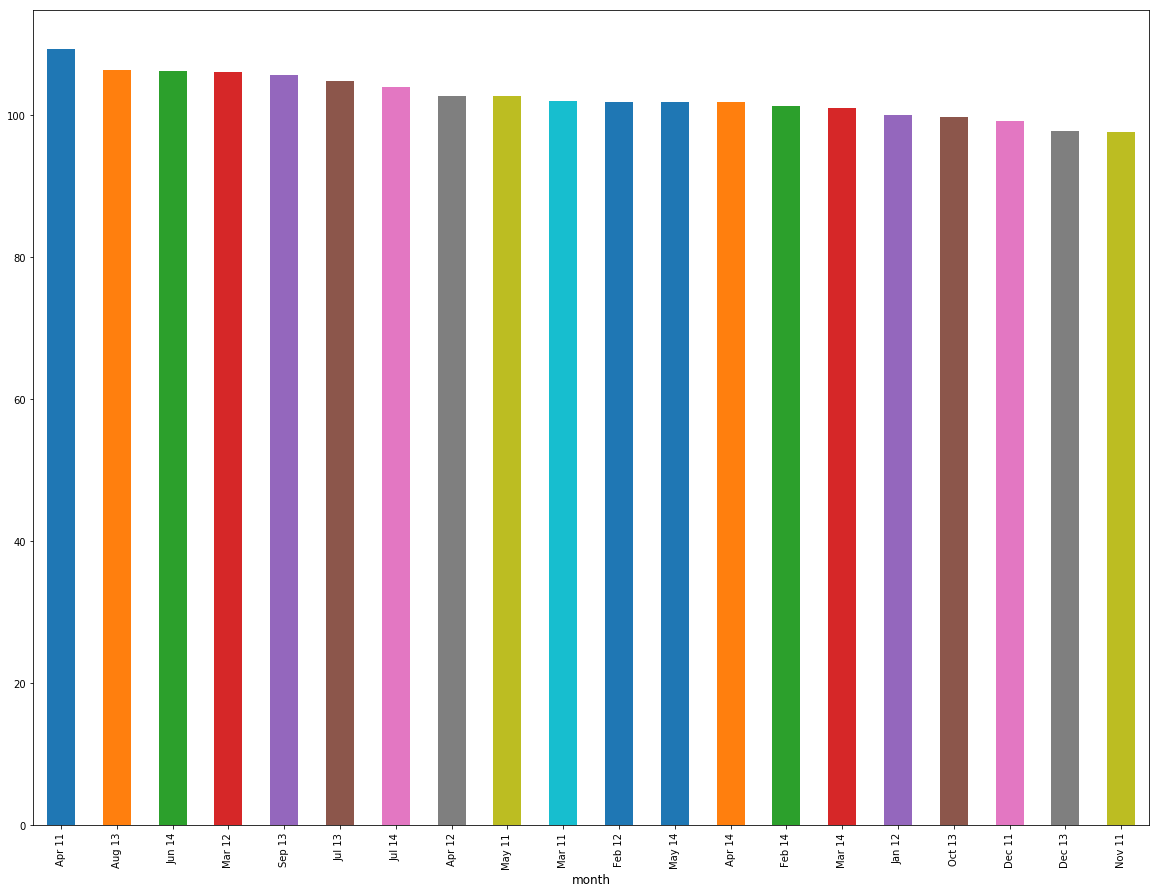

In [102]:
tp.head(20).plot.bar(x='month', y='ppb');
#maybe by counts - months with the most accidents